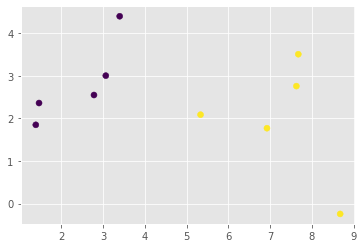

(10, 3)


In [24]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from math import sqrt

X = np.array([[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]])

plt.scatter(X[:,0], X[:,1], c=X[:,2])
plt.show()


# print(X[:,1])
# print(X[:,0])
print(X.shape)


In [15]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

In [1]:
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        # Find distace between a point in train vs test_row
        dist = euclidean_distance(test_row[:2], train_row[:2])
        # Add the train point with corresponding distace as a tuple to the list
        distances.append((train_row, dist))
    # Using python sort function to sort list of tuples
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [19]:
neighbors = get_neighbors(X, X[6], 3)
neighbors

[array([5.33244125, 2.08862677, 1.        ]),
 array([6.92259672, 1.77106367, 1.        ]),
 array([3.39656169, 4.40029353, 0.        ])]

In [20]:
output_values = [row[-1] for row in neighbors]
output_values

[1.0, 1.0, 0.0]

In [21]:
prediction = max(set(output_values), key=output_values.count)
prediction

1.0

In [23]:
# Expected output
X[6,-1]

1.0

# 2. Your implementation of the k-mean clustering algorithm

In [ ]:
#We just set up some starting values here, k is ...well... k. 
#The tol value is our tolerance, which will allow us to say we're optimized 
#if the centroid is not moving more than the tolerance value. 
#The max_iter value is to limit the number of cycles we're willing to run.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


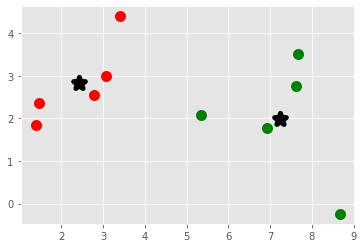

In [28]:
colors = 10*["g","r","c","b","k"]


class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):
        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            ## Finding the distances between each point and the centroids and then appending datapoints to the cluster of that centroid based on 
            ## minimum distance.
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            ## Update the new centroid as the average of the new centroids obtained from the new centroids and the previous centroid. 
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            ## Calculate the tolerance i.e difference between the centroids divide by the original centroid.
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
clf = K_Means()
clf.fit(X)

## Plotting the points and the centroids.
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="*", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="o", color=color, linewidths=5)
plt.show()